# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

Para poder hacer descripción de los datos, primeramente necesito ver cómo son. Por eso lo que voy a hacer es leerlos, y luego aplicar el método info() para tener una noción de cómo son "por dentro".

In [1]:
# importar librerías
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# leer conjuntos de datos en los DataFrames
insta_orders=pd.read_csv('/datasets/instacart_orders.csv',sep=';')
products=pd.read_csv('/datasets/products.csv',sep=';')
aisles=pd.read_csv('/datasets/aisles.csv',sep=';')
departments=pd.read_csv('/datasets/departments.csv',sep=';')
order_product=pd.read_csv('/datasets/order_products.csv',sep=';')

FileNotFoundError: [Errno 2] No such file or directory: '/datasets/instacart_orders.csv'

In [ ]:
# mostrar información del DataFrame
insta_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [ ]:
# mostrar información del DataFrame
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [ ]:
# mostrar información del DataFrame
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [ ]:
# mostrar información del DataFrame
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [ ]:
# mostrar información del DataFrame
order_product.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.

Los archivos, a pesar de ser csv, tienen un formato diferente. En la primera lectura que hice, solo se muestró como una columna a pesar de que hay varias. Por lo que utilicé sep para separarlas.


Y lo último que pude notar es que por ejemplo, en el último DataFrame no se muestran los valores nulos, solo están el índice, columna, y el tipo de dato.



# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

* Analizar si es seguro convertir datos
* Utilizar métodos que me permitan verificar si hay valores duplicados (duplicated().sum(),drop_duplicates(), y luego reset_index ya que afecta a los indices)
* Utilizar métodos que me permitan verificar si hay valores ausentes (isna(), y luego los rellenaré con la palabra "unknown") 

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [ ]:
# Revisa si hay pedidos duplicados
orders=insta_orders.duplicated().sum()
print(orders)
print()
print(insta_orders[insta_orders.duplicated()])


15

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411408   1286742   183220            48        

¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

Si, hay 15 duplicados.
Lo que tienen en comun son el dia de la semana en la que se hizo el pedido (3, que sería miércoles ya que la semana comienza en 0), y la hora (2)

In [ ]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.

print(insta_orders.query("order_dow == 3 and order_hour_of_day == 2"))

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      11.0  
15506                   

¿Qué sugiere este resultado?
Este resultado sugiere que si bien existen valores duplicados en los que fue el miércoles a las 2, al filtrar usando esas variables nos indica que hay 121 filas, osea, 121 pedidos fueron realizados en ese momento. 
Eso lleva a pensar que los valores duplicados se deben a otros motivos, no necesariamente por haberse realizado el miércoles a las 2.

In [ ]:
# Elimina los pedidos duplicados

orders1 = insta_orders.drop_duplicates().reset_index(drop=True)


print(orders1.duplicated().sum())

print(insta_orders)

0
        order_id  user_id  order_number  order_dow  order_hour_of_day  \
0        1515936   183418            11          6                 13   
1        1690866   163593             5          5                 12   
2        1454967    39980             4          5                 19   
3        1768857    82516            56          0                 20   
4        3007858   196724             2          4                 12   
...          ...      ...           ...        ...                ...   
478962   3210681     5617             5          1                 14   
478963   3270802   112087             2          3                 13   
478964    885349    82944            16          2                 11   
478965    216274     4391             3          3                  8   
478966   2071924     1730            18          1                 14   

        days_since_prior_order  
0                         30.0  
1                          9.0  
2                     

In [ ]:
# Vuelve a verificar si hay filas duplicadas
print(orders1.duplicated().sum())

0


In [ ]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos

print(insta_orders.duplicated('order_id').sum())

15


Describe brevemente tus hallazgos y lo que hiciste con ellos

Al aplicar el método duplicated() en la fila de los IDs de pedidos si nos salen que hay duplicados, pero eso puede significar que probablemente el producto fue pedido más de 1 vez.

### `products` data frame

In [ ]:
# Verifica si hay filas totalmente duplicadas
print(products.duplicated().sum())
print()
print(products[products.duplicated()])


0

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


In [ ]:
# Revisa únicamente si hay ID de departamentos duplicados
print(products.duplicated('product_id').sum())

0


In [ ]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
products['product_name']= products['product_name'].fillna('')

col=products['product_name']
new=[]
for names in col:
    new_name= names.upper()
    new.append(new_name)
products['product_name']=new

col2=['product_id','product_name']

print(products[col2])
print()
print(products.duplicated('product_name').sum())

       product_id                                       product_name
0               1                         CHOCOLATE SANDWICH COOKIES
1               2                                   ALL-SEASONS SALT
2               3               ROBUST GOLDEN UNSWEETENED OOLONG TEA
3               4  SMART ONES CLASSIC FAVORITES MINI RIGATONI WIT...
4               5                          GREEN CHILE ANYTIME SAUCE
...           ...                                                ...
49689       49690                      HIGH PERFORMANCE ENERGY DRINK
49690       49691                      ORIGINAL PANCAKE & WAFFLE MIX
49691       49692    ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR
49692       49693                             SPRING WATER BODY WASH
49693       49694                            BURRITO- STEAK & CHEESE

[49694 rows x 2 columns]

1361


In [ ]:
# Revisa si hay nombres duplicados de productos no faltantes
non_empty=products[products['product_name']!= '']
duplicate_count=non_empty['product_name'].duplicated().sum()
print(duplicate_count)

104


Describe brevemente tus hallazgos y lo que hiciste con ellos.


Descubrí que en este DataFrame, no hay valores duplicados. Si bien si tuvimos valores duplicados en el nombre de los productos los IDs de cada uno son diferentes.

### `departments` data frame

In [ ]:
# Revisa si hay filas totalmente duplicadas
print(departments.duplicated().sum())
#print()
#print(departments[products.duplicated()])


0


In [ ]:
# Revisa únicamente si hay IDs duplicadas de productos

print(departments.duplicated('department_id').sum())

0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Utilizando los métodos de duplicados, se puede ver que en este DataFrame no hay duplicados. Puede deberse a que no es un DataFrame muy grande como los otros.

### `aisles` data frame

In [ ]:
# Revisa si hay filas totalmente duplicadas
print(aisles.duplicated().sum())

0


In [ ]:
# Revisa únicamente si hay IDs duplicadas de pasillos
print(aisles.duplicated('aisle_id').sum())

0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Utilizando los métodos de duplicados, se puede ver que en este DataFrame no hay duplicados. Puede deberse a que no es un DataFrame muy grande como los otros.

### `order_products` data frame

In [ ]:
# Revisa si hay filas totalmente duplicadas
print(order_product.duplicated().sum())

0


In [ ]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
print(order_product['order_id'].nunique())
print()
print(order_product['product_id'].nunique())
print()
print(order_product['add_to_cart_order'].nunique())
print()
print(order_product['reordered'].nunique())

#print()
#print(order_product['add_to_cart_order'].sample(10))

450046

45573

64

2


In [ ]:
print(order_product['order_id'].duplicated().sum())
print()
print(order_product['product_id'].duplicated().sum())
print()
print(order_product['add_to_cart_order'].duplicated().sum())
print()
print(order_product['reordered'].duplicated().sum())

4094961

4499434

4544942

4545005


Describe brevemente tus hallazgos y lo que hiciste con ellos.

A primera vista no tenemos filas duplicadas, pero al revisar columna por columna, nos damos cuenta que sí. A pesar de eso, no podemos eliminarlos, ya que son valores que estamos analizando por separado. Puede ser que algo se haya pedido varias veces y por eso ciertos valores se repiten.

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [ ]:
# Encuentra los valores ausentes en la columna 'product_name'
are_empty=products[products['product_name']== '']
duplicates_count=are_empty['product_name'].duplicated().sum()
print(duplicates_count)

1257


Describe brevemente cuáles son tus hallazgos.

Tenemos una cantidad mayor a 1000 de valores ausentes.

In [ ]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
print(products.query("product_name == '' and aisle_id ==100"))
print()
print(products.query("product_name == '' and aisle_id !=100"))


       product_id product_name  aisle_id  department_id
37             38                    100             21
71             72                    100             21
109           110                    100             21
296           297                    100             21
416           417                    100             21
...           ...          ...       ...            ...
49552       49553                    100             21
49574       49575                    100             21
49640       49641                    100             21
49663       49664                    100             21
49668       49669                    100             21

[1258 rows x 4 columns]

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


Describe brevemente cuáles son tus hallazgos.

A través del filtrado con query, podemos ver que los nombres de productos que están vacios, si están relacionados al pasillo con ID 100.

In [ ]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
print(products.query("product_name == '' and department_id !=21"))
print()
print(products.query("product_name == '' and department_id ==21"))

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []

       product_id product_name  aisle_id  department_id
37             38                    100             21
71             72                    100             21
109           110                    100             21
296           297                    100             21
416           417                    100             21
...           ...          ...       ...            ...
49552       49553                    100             21
49574       49575                    100             21
49640       49641                    100             21
49663       49664                    100             21
49668       49669                    100             21

[1258 rows x 4 columns]


Describe brevemente cuáles son tus hallazgos.

A través del filtrado con query, podemos ver que los nombres de productos que están vacios, si están relacionados al departamento con ID 21.

In [ ]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
#print(products.query("product_name == '' and department_id ==21 and aisle_id ==100"))

both = products.merge(aisles,on='aisle_id', how='outer')
print(both.query("product_name == '' and department_id ==21 and aisle_id ==100"))


       product_id product_name  aisle_id  department_id    aisle
16958          38                    100             21  missing
16959          72                    100             21  missing
16960         110                    100             21  missing
16961         297                    100             21  missing
16962         417                    100             21  missing
...           ...          ...       ...            ...      ...
18211       49553                    100             21  missing
18212       49575                    100             21  missing
18213       49641                    100             21  missing
18214       49664                    100             21  missing
18215       49669                    100             21  missing

[1258 rows x 5 columns]


Describe brevemente cuáles son tus hallazgos.

Después de combinar las tablas, pudimos ver que todos los valores de pasillo con ID 100 y el departamento con ID 21 dice "missing", osea, que están perdidos.

In [ ]:
# Completa los nombres de productos ausentes con 'Unknown'
col4=products['product_name']

new_empty=[]

for names in col4:
    if names == '':
        new_empty_name='unknown'
        new_empty.append(new_empty_name)
    else:
        new_empty.append(names)
    
    
products['product_name']=new_empty
print(products['product_name'].isna())

0        False
1        False
2        False
3        False
4        False
         ...  
49689    False
49690    False
49691    False
49692    False
49693    False
Name: product_name, Length: 49694, dtype: bool


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Para uno de los ejercicios anteriores, tuve que reemplazar los valores ausentes para poder ejecutar el código. Ahora, he reemplazado los valores ausentes con la palabra "unknown".

### `orders` data frame

In [ ]:
# Encuentra los valores ausentes
print(insta_orders.isna().sum())

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28819
dtype: int64


In [ ]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
print(insta_orders.info())
print()
print(insta_orders.nunique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB
None

order_id                  478952
user_id                   157437
order_number                 100
order_dow                      7
order_hour_of_day             24
days_since_prior_order        31
dtype: int64


Describe brevemente tus hallazgos y lo que hiciste con ellos.
A través de la información del dataframe y el recuento de valores únicos, podemos ver que solamente en la columna " days_since_prior_order " encontramos valores ausentes. 

### `order_products` data frame

In [ ]:
# Encuentra los valores ausentes

print(order_product.isna().sum())
print()
print(order_product['add_to_cart_order'].isna())

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

0          False
1          False
2          False
3          False
4          False
           ...  
4545002    False
4545003    False
4545004    False
4545005    False
4545006    False
Name: add_to_cart_order, Length: 4545007, dtype: bool


In [ ]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print(order_product['add_to_cart_order'].min())
print()
print(order_product['add_to_cart_order'].max())


1.0

64.0


Describe brevemente cuáles son tus hallazgos.

La columna 'add_to_cart' si tiene valores ausentes, pero podemos ver que tiene valores que van del 1 al 64. Lo cual es llamativo, porque si esta columna explica el proceso del carrito de compras, y empieza en 1, qué podrían ser los valores ausentes.

In [ ]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
non_value= order_product[order_product['add_to_cart_order'].isna()]

missing_order_ids = non_value['order_id'].unique()
print(non_value)

         order_id  product_id  add_to_cart_order  reordered
737       2449164        5068                NaN          0
9926      1968313       43867                NaN          0
14394     2926893       11688                NaN          0
16418     1717990        4142                NaN          0
30114     1959075       42828                NaN          1
...           ...         ...                ...        ...
4505662   1800005        7411                NaN          0
4511400   1633337         260                NaN          0
4517562    404157        9517                NaN          0
4534112   1673227       17835                NaN          0
4535739   1832957       17949                NaN          1

[836 rows x 4 columns]


In [ ]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.


In [ ]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?

# Primero identificamos los pedidos con valores ausentes
pedidos_con_ausentes = order_product[order_product['add_to_cart_order'].isna()]['order_id'].unique()

# Contamos cuántos productos hay en cada pedido
conteo_productos = order_product.groupby('order_id')['product_id'].count()

todos_mas_de_64 = True

# Verificamos cada pedido individualmente
for pedido in pedidos_con_ausentes:
    if pedido in conteo_productos.index:
        if conteo_productos[pedido] <= 64:
            todos_mas_de_64 = False
            break
    else:
        # Si el pedido no está en conteo_productos, consideramos que no cumple la condición
        todos_mas_de_64 = False
        break
        
print(f"¿Todos los pedidos con valores ausentes tienen más de 64 productos? {todos_mas_de_64}")

¿Todos los pedidos con valores ausentes tienen más de 64 productos? True


In [ ]:
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
empty_val= order_product[order_product['add_to_cart_order'].isna()]
ordered_emtpy= empty_val.groupby('order_id').size()
print(ordered_emtpy)

order_id
9310        1
61355      63
102236     31
129627      5
165801      6
           ..
2999801     6
3125735    22
3308010    51
3347453     7
3383594     5
Length: 70, dtype: int64


In [ ]:
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
counting = order_product.groupby('order_id')['product_id'].count()
print(counting.sort_values())

order_id
3421079      1
1288686      1
1288764      1
1288825      1
1288873      1
          ... 
1959075     98
171934     104
2136777    108
3308010    115
61355      127
Name: product_id, Length: 450046, dtype: int64


Describe brevemente cuáles son tus hallazgos.

Pudimos ver que la columna de 'order_id' agrupada tiene una longitud de 70, lo cual quiere decir que se hizo el pedido de algo unas x cantidades de veces y tienen 'add_to_cart_order' en blanco.

In [ ]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
order_product['add_to_cart_order']=order_product['add_to_cart_order'].fillna(999)
print(order_product.info())
order_product['add_to_cart_order'] = order_product['add_to_cart_order'].astype('int')
#print(order_product.isna().sum())
print()
print(order_product.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 138.7 MB
None


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Para trabajar más fácilmente con el dataframe, rellené los espacios como se indicó. Así también cambié el tipo de dato de "add_to_cart_order" (esto último también realizado para trabajar más fácilmente con los datos).

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos

A pesar de que los datos a primera vista parecen estar correctos, luego de aplicar métodos para encontrar duplicados, espacios en blanco y demás, se pudo ver que los mismos no estaban tan limpios y ordenados como parecían. 


# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [ ]:
#Verifica que los valores en las columnas 'order_hour_of_day' y 'order_dow' en la tabla orders sean razonables 
#(es decir, 'order_hour_of_day' oscile entre 0 y 23 y 'order_dow' oscile entre 0 y 6).

#insta_orders.info()
#print('Valores para las horas del dia:',insta_orders['order_hour_of_day'].min(), insta_orders['order_hour_of_day'].max())
#print()
#print('Valores para los dias:',insta_orders['order_dow'].min(),insta_orders['order_dow'].max())



# Valores únicos en order_hour_of_day
print("Valores únicos en 'order_hour_of_day':", sorted(insta_orders['order_hour_of_day'].unique()))
print(insta_orders['order_hour_of_day'].value_counts().sort_index())

# Valores únicos en order_dow
print("\nValores únicos en 'order_dow':", sorted(insta_orders['order_dow'].unique()))
print(insta_orders['order_dow'].value_counts().sort_index())

# Estadísticas generales
print("\nEstadísticas de 'order_hour_of_day':\n", insta_orders['order_hour_of_day'].describe())
print("\nEstadísticas de 'order_dow':\n", insta_orders['order_dow'].describe())


Valores únicos en 'order_hour_of_day': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
0      3180
1      1763
2      1004
3       770
4       765
5      1371
6      4215
7     13043
8     25024
9     35896
10    40578
11    40032
12    38034
13    39007
14    39631
15    39789
16    38112
17    31930
18    25510
19    19547
20    14624
21    11019
22     8512
23     5611
Name: order_hour_of_day, dtype: int64

Valores únicos en 'order_dow': [0, 1, 2, 3, 4, 5, 6]
0    84090
1    82185
2    65833
3    60912
4    59810
5    63488
6    62649
Name: order_dow, dtype: int64

Estadísticas de 'order_hour_of_day':
 count    478967.000000
mean         13.446676
std           4.224986
min           0.000000
25%          10.000000
50%          13.000000
75%          16.000000
max          23.000000
Name: order_hour_of_day, dtype: float64

Estadísticas de 'order_dow':
 count    478967.000000
mean          2.775058
std           2.045869
min           0.000000
2

Escribe aquí tus conclusiones

No hay ningun problema. El dia tiene 24 horas, y la semana 7 dias.

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

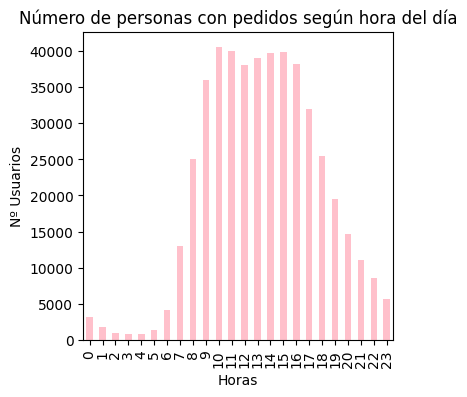

In [ ]:
#Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
#insta_orders.info()
people_hour = insta_orders.groupby('order_hour_of_day')['user_id'].count()
#print(people_hour)

people_hour.plot(x='order_hour_of_day',y='user_id',xlabel='Horas',ylabel='Nº Usuarios',title='Número de personas con pedidos según hora del día', kind='bar',color='pink', figsize=[4,4],rot=90)

#plt.xticks(rotation=0)  # You can adjust the degree of rotation (45, 90, etc.)

# Make sure the rotated labels don't get cut off
#plt.tight_layout()

plt.show()

Escribe aquí tus conclusiones

Las horas en las que la gente hace más pedidos es entre las horas del mediodía, pero específicamente a las 10 am.
También es interesante ver que la gente hace pedidos durante todo el día, incluso durante la madrugada.

### [A3] ¿Qué día de la semana compran víveres las personas?

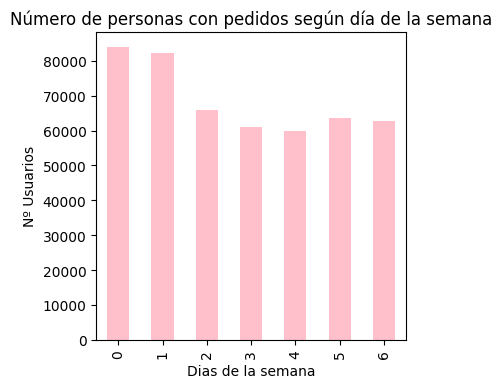

In [ ]:
#Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
people_day = insta_orders.groupby('order_dow')['user_id'].count()
#print(people_day)

people_day.plot(x='order_dow',y='user_id',xlabel='Dias de la semana',ylabel='Nº Usuarios',title='Número de personas con pedidos según día de la semana', kind='bar',color='pink', figsize=[4,4],rot=90)
plt.show()

Escribe aquí tus conclusiones

Los días con mayor compra son los domingos y lunes. Es interesante ver el nivel de compras de los viernes sea menora al del lunes.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

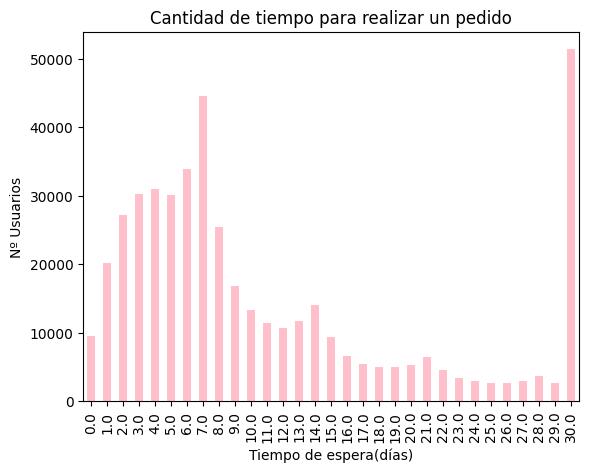

Menor tiempo: 0.0

Mayor tiempo: 30.0


In [ ]:
#Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, 
#y comenta sobre los valores mínimos y máximos.

#insta_orders.info()
people_buying_time = insta_orders.groupby('days_since_prior_order')['user_id'].count()
#print(people_buying_time)

people_buying_time.plot(x='days_since_prior_order',y='user_id',xlabel='Tiempo de espera(días)',ylabel='Nº Usuarios',title='Cantidad de tiempo para realizar un pedido', kind='bar',color='pink')
plt.show()

min_days= people_buying_time.index.min()
max_days = people_buying_time.index.max()

print('Menor tiempo:',min_days)
print()
print('Mayor tiempo:',max_days)

Escribe aquí tus conclusiones
* Podemos ver que mucha gente espera 30 dias para volver a realizar otro pedido.
* Los días entre pedidos que tienen 0, podrían significar que hay personas que realizan solamente una vez un pedido.
* Uno de los valores más altos es cada 7 días. Esto puede deberse a que las personas les puede gustar iniciar la semana con la alacena hecha y completa.


# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

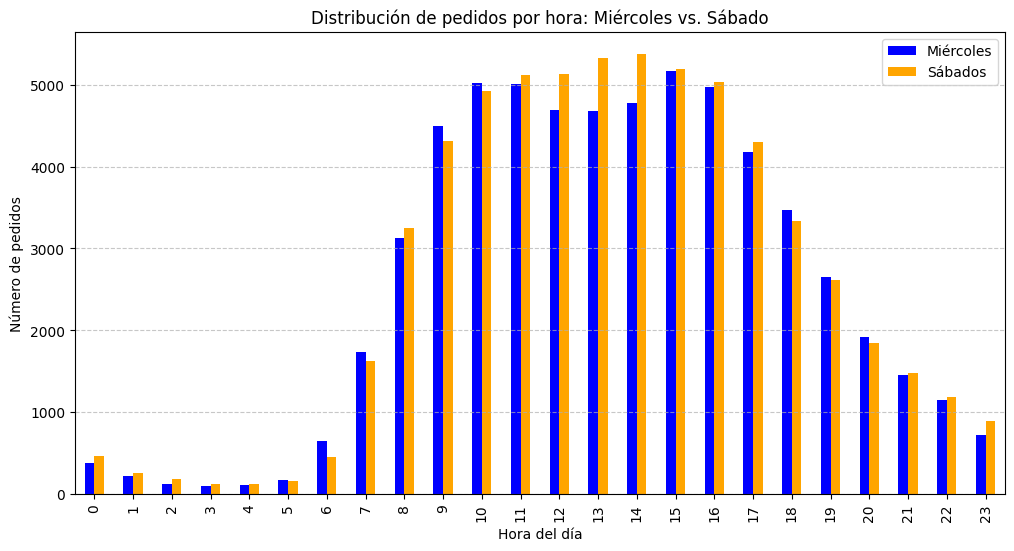

In [ ]:
#¿Existe alguna diferencia entre las distribuciones 'order_hour_of_day' de los miércoles y los sábados? 
#Traza gráficos de barra de 'order_hour_of_day' para ambos días en la misma figura y describe las diferencias que observes.

#per_day = insta_orders.groupby('order_dow')['order_hour_of_day']

#insta_orders.info()
#print()
#print(per_day)


miercoles_orders = insta_orders[insta_orders['order_dow'] == 3]
sabados_orders = insta_orders[insta_orders['order_dow'] == 6]

wednesday_counts = miercoles_orders['order_hour_of_day'].value_counts().sort_index()
saturday_counts = sabados_orders['order_hour_of_day'].value_counts().sort_index()


insta_orders[insta_orders['order_dow'].isin([3, 6])].groupby(['order_hour_of_day', 'order_dow']).size().unstack().plot(kind='bar', figsize=(12,6), xlabel="Hora del día", ylabel="Número de pedidos",
          title="Distribución de pedidos por hora: Miércoles vs. Sábado", color=['blue', 'orange'])

plt.legend(["Miércoles", "Sábados"])
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


Escribe aquí tus conclusiones

Podemos ver que hay mas actividad de mañana que de noche y madrugada.
Desde las 7 hasta las 10 de la mañana los miércoles son mayores a los sábados.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [ ]:
#Grafica la distribución para el número de órdenes que hacen los clientes 
#(es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).

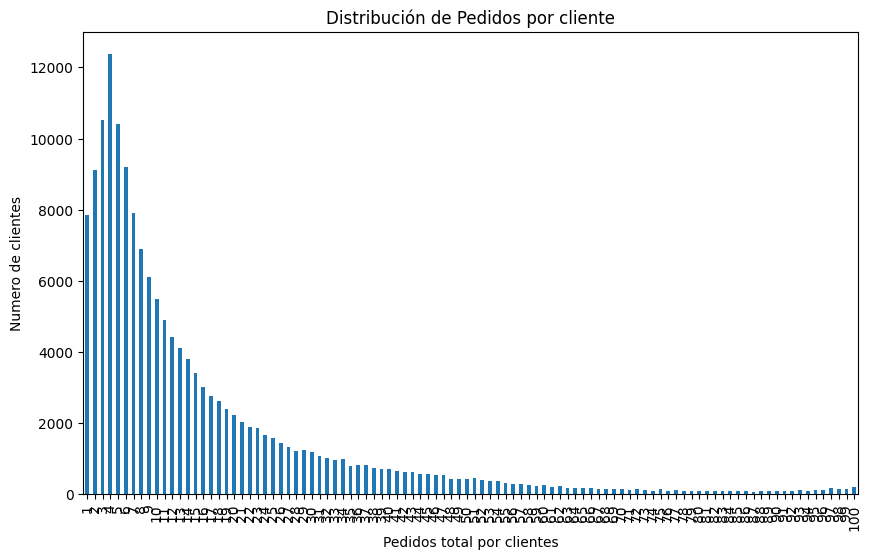

In [ ]:
#insta_orders.info()

#buying_per_client = insta_orders.groupby('order_number')['user_id'].count()
#print(buying_per_client)
#print(insta_orders.head())


buying_per_client = insta_orders.groupby('user_id')['order_number'].max().value_counts().sort_index()
buying_per_client.plot(x='order_number',y='user_id',xlabel='Pedidos total por clientes',ylabel='Numero de clientes', title='Distribución de Pedidos por cliente',kind='bar',figsize=[10,6])
plt.show()


Escribe aquí tus conclusiones
El mayor número es de 12000.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [ ]:
#¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

    product_id  order_count              product_name
0        24852        66050                    Banana
1        13176        53297    Bag of Organic Bananas
2        21137        37039      Organic Strawberries
3        21903        33971      Organic Baby Spinach
4        47209        29773      Organic Hass Avocado
5        47766        24689           Organic Avocado
6        47626        21495               Large Lemon
7        16797        20018              Strawberries
8        26209        19690                     Limes
9        27845        19600        Organic Whole Milk
10       27966        19197       Organic Raspberries
11       22935        15898      Organic Yellow Onion
12       24964        15292            Organic Garlic
13       45007        14584          Organic Zucchini
14       39275        13879       Organic Blueberries
15       49683        13675            Cucumber Kirby
16       28204        12544        Organic Fuji Apple
17        5876        12232 

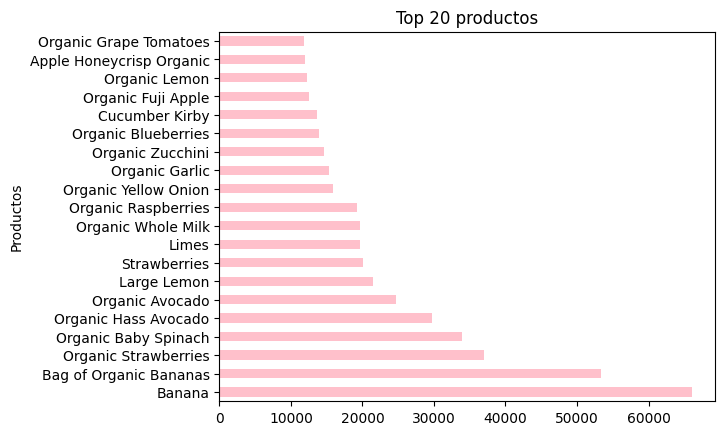

In [ ]:
top_products = order_product['product_id'].value_counts().head(20).reset_index()
top_products.columns = ['product_id', 'order_count']
top_products = top_products.merge(products[['product_id', 'product_name']], on='product_id', how='left')

print(top_products)

top_products.plot(kind='barh',x='product_name',y='order_count', xlabel='Productos',ylabel='Cantidad',title='Top 20 productos',legend=False, color='pink')
plt.show()

Escribe aquí tus conclusiones

Podemos ver que la mayoría de los productos son orgánicos.

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [ ]:
#¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?

In [ ]:
items_per_order = order_product.groupby('order_id')['product_id'].count()

# Mostrar estadísticas generales
print(items_per_order.describe())

count    450046.000000
mean         10.098983
std           7.540206
min           1.000000
25%           5.000000
50%           8.000000
75%          14.000000
max         127.000000
Name: product_id, dtype: float64


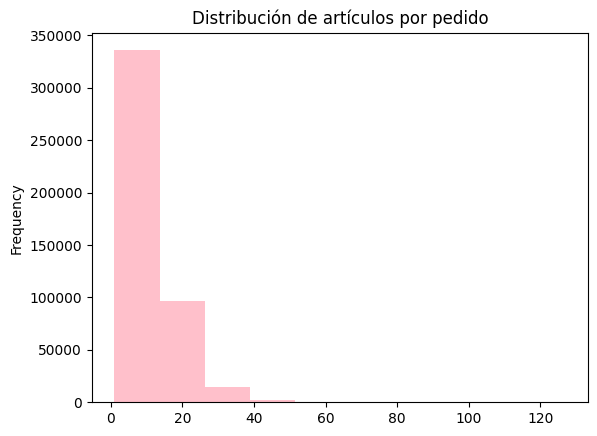

In [ ]:
items_per_order.plot(kind='hist',x='product_id',y='order_id',xlabel='Número de productos en un pedido',ylabel='cantidad de pedidos',title='Distribución de artículos por pedido',color='pink')
plt.show()

Escribe aquí tus conclusiones
La mayoria de los pedidos tienen pocos articulos. A partir de 40 articulos, los pedidos son casi nulos.  

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [ ]:
#¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [ ]:
top_reordered = order_product[order_product['reordered'] == 1]  # Filtrar reordenados
top_reordered = top_reordered['product_id'].value_counts().head(20).reset_index()
top_reordered.columns = ['product_id', 'reorder_count']

# Unir con el nombre del producto
top_reordered = top_reordered.merge(products[['product_id', 'product_name']], on='product_id', how='left')

print(top_reordered)



#top_products.plot(kind='hist',title='Distribución de artículos por pedido',color='pink',figsize=[4,4])
#plt.show()

    product_id  reorder_count              product_name
0        24852          55763                    BANANA
1        13176          44450    BAG OF ORGANIC BANANAS
2        21137          28639      ORGANIC STRAWBERRIES
3        21903          26233      ORGANIC BABY SPINACH
4        47209          23629      ORGANIC HASS AVOCADO
5        47766          18743           ORGANIC AVOCADO
6        27845          16251        ORGANIC WHOLE MILK
7        47626          15044               LARGE LEMON
8        27966          14748       ORGANIC RASPBERRIES
9        16797          13945              STRAWBERRIES
10       26209          13327                     LIMES
11       22935          11145      ORGANIC YELLOW ONION
12       24964          10411            ORGANIC GARLIC
13       45007          10076          ORGANIC ZUCCHINI
14       49683           9538            CUCUMBER KIRBY
15       28204           8989        ORGANIC FUJI APPLE
16        8277           8836  APPLE HONEYCRISP 

Escribe aquí tus conclusiones

* Los productos que se piden con mayor frecuencia corresponden a las frutas y verduras. 
* De esto podemos suponer que, la mayoria de usuarios quieren tener una alimentación y dieta saludables.


### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [ ]:
#Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?

In [ ]:
# Contar el número total de pedidos por producto
total_orders = order_product['product_id'].value_counts().reset_index()
total_orders.columns = ['product_id', 'total_orders']

# Contar cuántos de esos pedidos fueron reordenados
reordered_counts = order_product[order_product['reordered'] == 1]['product_id'].value_counts().reset_index()
reordered_counts.columns = ['product_id', 'reordered_orders']

# Unir ambos DataFrames
reorder_rate = total_orders.merge(reordered_counts, on='product_id', how='left')

# Calcular la tasa de repetición
reorder_rate['reordered_orders'] = reorder_rate['reordered_orders'].fillna(0)
reorder_rate['reorder_rate'] = reorder_rate['reordered_orders'] / reorder_rate['total_orders']

# Unir con los nombres de los productos
reorder_rate = reorder_rate.merge(products[['product_id', 'product_name']], on='product_id', how='left')

# Mostrar el resultado
print(reorder_rate[['product_id', 'product_name', 'reorder_rate']])


       product_id                           product_name  reorder_rate
0           24852                                 BANANA      0.844254
1           13176                 BAG OF ORGANIC BANANAS      0.834006
2           21137                   ORGANIC STRAWBERRIES      0.773212
3           21903                   ORGANIC BABY SPINACH      0.772217
4           47209                   ORGANIC HASS AVOCADO      0.793639
...           ...                                    ...           ...
45568       10543         BLUEBERRY PREMIUM FRUIT SPREAD      0.000000
45569        5222              ORGANIC BEEF & BURGER RUB      0.000000
45570        2347  PREMIUM MO' BETA FRUIT SMOOTHIE BLEND      0.000000
45571       11893                                unknown      0.000000
45572       32074          UNSCENTED SENSITIVE BODY WASH      0.000000

[45573 rows x 3 columns]


Escribe aquí tus conclusiones

Podemos ver que por ejemplo, la tasa de repeticion de la banana es una de las mas altas. Es interesante ver que por ejemplo la carne no tiene tasa de repeticion. Tambien se puede ver que los productos organicos son pedidos reiteradas veces. 

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [ ]:
#Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? 
#Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.

         total_products  reordered_products  reorder_rate
user_id                                                  
2                    26                   1      0.038462
4                     2                   0      0.000000
5                    12                   8      0.666667
6                     4                   0      0.000000
7                    14                  13      0.928571
...                 ...                 ...           ...
206203               27                   6      0.222222
206206               21                  15      0.714286
206207               46                  41      0.891304
206208              125                  87      0.696000
206209               25                   8      0.320000

[149626 rows x 3 columns]


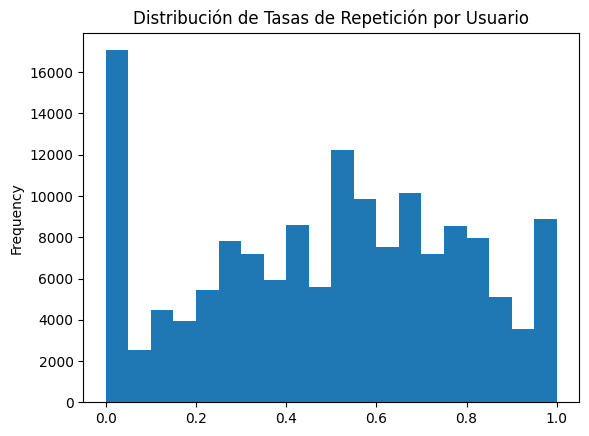

In [ ]:
order_insta= insta_orders.merge(order_product,on='order_id')
#print(order_insta)

# Paso 2: Agrupar por usuario y calcular la proporción de productos reordenados
user_reorder_rates = order_insta.groupby('user_id').agg(
    total_products=('product_id', 'count'),
    reordered_products=('reordered', 'sum')
)

# Paso 3: Calcular la proporción
user_reorder_rates['reorder_rate'] = user_reorder_rates['reordered_products'] / user_reorder_rates['total_products']

# Mostrar los resultados
print(user_reorder_rates)

user_reorder_rates['reorder_rate'].plot(kind='hist',title='Distribución de Tasas de Repetición por Usuario',bins=20)
plt.show()

Escribe aquí tus conclusiones

12000 usuarios tienen una tasa de frecuencia de alrededor 0.5. Casi 16500 usuarios tienen una tasa 0, lo que significa que no han vuelto a comprar.

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [ ]:
#¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos 
#(muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

In [ ]:
# Paso 1: Filtrar solo los productos que fueron añadidos primero al carrito
first_items = order_product[order_product['add_to_cart_order'] == 1]

# Paso 2: Contar cuántas veces cada producto fue el primero en añadirse
first_item_counts = first_items.groupby('product_id').size().reset_index(name='count')

# Paso 3: Ordenar de mayor a menor según la frecuencia
first_item_counts = first_item_counts.sort_values('count', ascending=False)

# Paso 4: Unir con la tabla de productos para obtener los nombres
top_first_items = pd.merge(first_item_counts, products[['product_id', 'product_name']], on='product_id')

# Paso 5: Mostrar los 20 principales
top_20_first_items = top_first_items.head(20)
print(top_20_first_items)

    product_id  count                 product_name
0        24852  15562                       BANANA
1        13176  11026       BAG OF ORGANIC BANANAS
2        27845   4363           ORGANIC WHOLE MILK
3        21137   3946         ORGANIC STRAWBERRIES
4        47209   3390         ORGANIC HASS AVOCADO
5        21903   3336         ORGANIC BABY SPINACH
6        47766   3044              ORGANIC AVOCADO
7        19660   2336                 SPRING WATER
8        16797   2308                 STRAWBERRIES
9        27966   2024          ORGANIC RASPBERRIES
10       44632   1914   SPARKLING WATER GRAPEFRUIT
11       49235   1797          ORGANIC HALF & HALF
12       47626   1737                  LARGE LEMON
13         196   1733                         SODA
14       38689   1397     ORGANIC REDUCED FAT MILK
15       26209   1370                        LIMES
16       12341   1340                HASS AVOCADOS
17        5785   1310  ORGANIC REDUCED FAT 2% MILK
18       27086   1309          

Escribe aquí tus conclusiones
De nuevo, la banana es la elegida por la gente. Podemos ver de nuevo que los primeros resultados indican que la gente siempre escoge sus frutas o verduras primero.

### Conclusion general del proyecto:

**Proyecto: Análisis de Pedidos en Instacart
A lo largo de este proyecto, se realizó un análisis detallado de los datos de pedidos de la plataforma Instacart.**

A continuación, se presentan los pasos realizados y las conclusiones clave:

1. Carga e Importación de Datos
Se importaron y exploraron los datasets relacionados con pedidos, productos, pasillos y departamentos.
Se verificó la estructura de los datos y se identificaron valores nulos en algunas columnas.
2. Limpieza y Preparación de los Datos
Se manejaron valores nulos en la columna days_since_prior_order, ya que estos correspondían a clientes que realizaban su primer pedido.
Se verificó que los valores en order_hour_of_day (0-23) y order_dow (0-6) fueran razonables.
Se comprobó que la variable add_to_cart_order tuviera un máximo de 64, lo que sugiere una posible restricción en el sistema de Instacart.
3. Análisis de Frecuencia de Pedidos
Se identificaron los 20 productos más pedidos, mostrando sus nombres e identificadores.
Se realizó un gráfico de barras para visualizar estos productos y sus respectivas cantidades.
4. Análisis de Reordenamiento de Productos
Se calcularon los productos más frecuentemente reordenados.
Se analizó la tasa de repetición de cada producto como la relación entre reordenamientos y pedidos totales.
5. Distribución de Artículos por Pedido
Se analizó la cantidad de artículos comprados por pedido y se generó una distribución visual.
Se concluyó que la mayoría de los pedidos contienen menos de 20 artículos.

Conclusiones Generales
* Tendencias de Pedido: La mayoría de los pedidos contienen pocos productos, con un límite máximo de 64 artículos.
* Productos más populares: Se identificaron los productos más vendidos y los más reordenados, lo que puede ayudar a optimizar la disponibilidad de inventario.
* Tasa de reordenamiento: Se determinó qué productos tienen mayor recurrencia en los pedidos, información útil para promociones y estrategias de marketing.
* Calidad de los datos: No se encontraron valores inconsistentes en variables clave como el día y la hora del pedido.